Copied from fabric_gan_dropout.ipynb
packaging with pyfunc

In [0]:
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [24]:
%cd  /content/drive/My\ Drive/AISC_GAN_ws_2020/african_fabric/packaging_cpu/
%pwd
%ls

/content/drive/My Drive/AISC_GAN_ws_2020/african_fabric/packaging_cpu
data/                              meta_data.txt  __pycache__/
fabric_gan_package_cpu.ipynb       model/
load_fabric_gan_package_cpu.ipynb  model.py


In [0]:
from __future__ import print_function
#%matplotlib inline
import argparse
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.nn.functional as F
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Set random seem for reproducibility
manualSeed = 999
#manualSeed = random.randint(1, 10000) # use if you want new results
print("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)

optim
print('\nDone with setting seed')

LOAD back saved CPU model

In [0]:
!pip install MLflow

In [0]:
import mlflow
import mlflow.pyfunc

In [27]:
!ls /content/drive/My\ Drive/AISC_GAN_ws_2020/african_fabric/packaging_cpu/model/
!ls /content/drive/My\ Drive/AISC_GAN_ws_2020/african_fabric/packaging_cpu/model/model/

model  state_dict.pt
artifacts  code  conda.yaml  MLmodel  python_model.pkl


LOAD IN THE SERIALISED MODEL

In [28]:
# Load the model in `python_function` format

mlflow_pyfunc_model_path = f"/content/drive/My Drive/AISC_GAN_ws_2020/african_fabric/packaging_cpu/model/model"

loaded_model = mlflow.pyfunc.load_model(mlflow_pyfunc_model_path)

print(loaded_model)

dummy=0
outimage = loaded_model.predict(dummy)


self.device =  cpu


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


type(outimage) =  <class 'torch.Tensor'>
outimage.shape) =  torch.Size([64, 3, 64, 64])

type(imggrd) =  <class 'torch.Tensor'>
imggrd.shape) =  torch.Size([3, 530, 530])


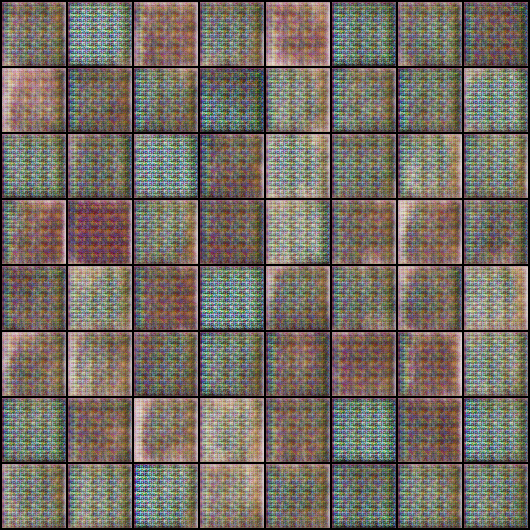

In [40]:
from PIL import Image

print('type(outimage) = ',type(outimage))
print('outimage.shape) = ',outimage.shape)

imgnp = outimage.numpy()
#print('\ntype(imgnp) = ',type(imgnp))
#print('imgnp.shape) = ',imgnp.shape)

imggrd = vutils.make_grid(outimage, padding=2, normalize=True)

print('\ntype(imggrd) = ',type(imggrd))
print('imggrd.shape) = ',imggrd.shape)


#print('\n\toutimage = ',outimage[0:64:30,0:3,0:64:30,0:64:30])
#print('\n\timgnp = ',imgnp[0:64:30,0:3,0:64:30,0:64:30])
#print('\nimggrd = ',imggrd[0:3,0:530:100,0:530:100])

npimg = imggrd.numpy()
npimgT = np.transpose(npimg,(1,2,0))

imgPIL = Image.fromarray((255*npimgT).astype("uint8"),'RGB')

#plt.figure(1)
#plt.imshow(imgPIL) #.show()
#imgPIL 

#plt.figure(2)
#plt.imshow(npimgT)

#plt.show()


<class 'torch.Tensor'>
torch.Size([64, 3, 64, 64])


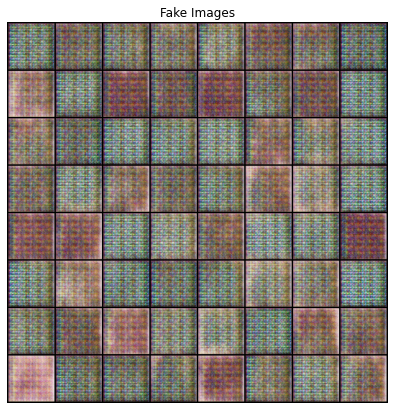

In [0]:
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt

print('type(outimage) = ',type(outimage))
print('outimage.shape) = '',outimage.shape)



img_list = []
img_list.append(vutils.make_grid(outimage, padding=2, normalize=True))

# Plot the real images
plt.figure(figsize=(15,15))

# Plot the fake images from the last epoch
plt.subplot(1,2,2)
plt.axis("off")
plt.title("Fake Images")
plt.imshow(np.transpose(img_list[-1],(1,2,0)))
#plt.imshow(np.transpose(outimage[-1],(1,2,0)))
#plt.imshow(np.transpose(img[:,:,:,5],(0,2,1)))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<class 'torch.Tensor'> False
torch.Size([64, 3, 64, 64])

 <class 'numpy.ndarray'>

 (64, 3, 64, 64)


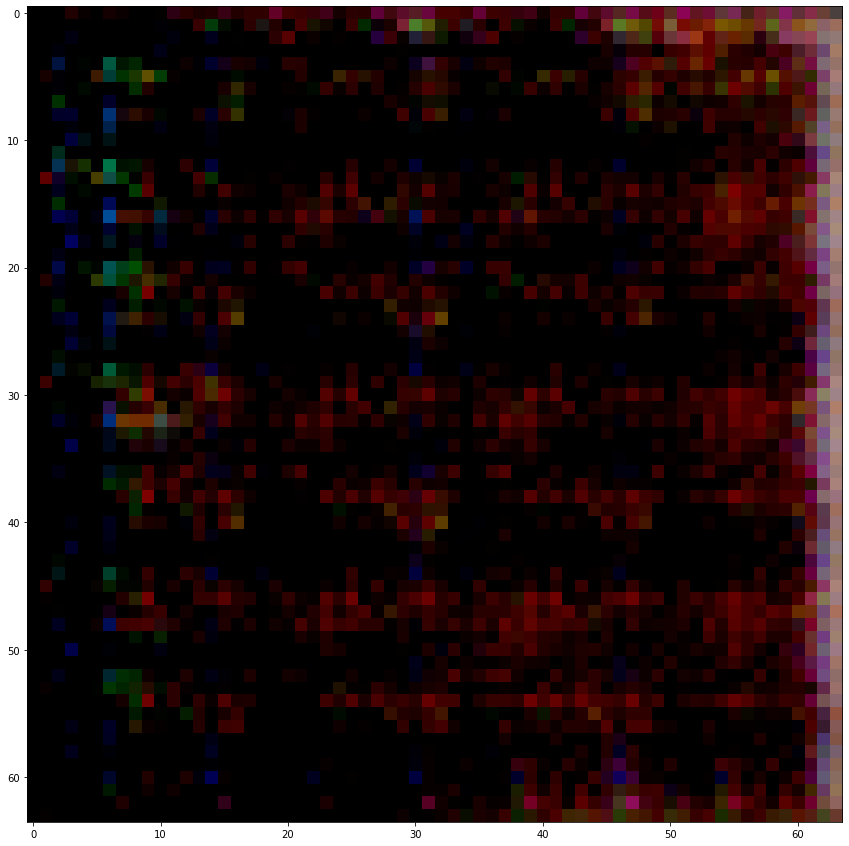

In [0]:
#dummy=0
#outimage = loaded_model.predict(dummy)


print(type(outimage),outimage.is_cuda)
print(outimage.shape)

#img_list = []
#img_list.append(vutils.make_grid(outimage, padding=2, normalize=True))
imgnp = outimage.numpy()

print('\n',type(imgnp))
print('\n',imgnp.shape) #(64, 3, 64, 64)

singleimg = imgnp[5,:,:,:]

# # Plot the real images
plt.figure(figsize=(15,15))

plt.imshow(np.transpose(singleimg,(1,2,0)))

# # Plot the fake images from the last epoch
# plt.subplot(1,2,2)
# plt.axis("off")
# plt.title("Fake Images")
# plt.imshow(np.transpose(img_list[-1],(1,2,0)))
# #plt.imshow(np.transpose(outimage[-1],(1,2,0)))
# #plt.imshow(np.transpose(img[:,:,:,5],(0,2,1)))
# plt.show()